# **Proyecto 3 - Analítica de Datos con Python**
## **Turismo y Viajes** 🌎🏘️🏝️🏜️🏖️

### 🙈🙉🙊 **Integrantes:**
- 👩 Daniela Ussa Villa - **Código:** 2246449
- 👩‍🦰 Luisa Fernanda Muñoz Cardona - **Código:** 2247537
- 🧑 Daniel David García Restrepo - **Código:** 2246989

## 🎯 **Objetivo del Proyecto**
##### Analizar la evolución del turismo en Colombia desde una perspectiva económica, visualizando y comparando variables clave como llegadas, exportaciones, gasto turístico, desempleo, entre otros. El análisis se centrará en los años disponibles en el conjunto de datos para evaluar tendencias y responder a la pregunta: **¿Podrá el turismo realmente impulsar a la economía?**

## 🤓 **Contextualización**

##### Para este proyecto, se trabajo con un conjunto de datos descargado en Kaggle, el cual incluye indicadores turísticos y económicos para más de 200 países, desde 1999 hasta 2023. Cuenta con una amplia cantidad de datos relacionados con llegadas de turistas, gastos, ingresos, PIB, desempleo e inflación, esta información nos ayudará a explorar la relación entre el turismo y el crecimiento económico a nivel Colombia.

## 🧐 **Análisis - Columnas Dataset**

##### El conjunto de datos descargado cuenta con las siguientes columnas:

- 🌍 **country** y **country_code**: El nombre y código de cada país para el cual se informan los datos.
- 📅 **year**: El año para el que se informan los datos (1999 - 2023).
- 💰 **tourism_receipts**: El ingreso total que un país genera por turismo internacional, medido en dólares estadounidenses.
- 🌍 **tourism_arrivals**: El número total de turistas internacionales que llegan a un país, medido en unidades de conteo.
- 📈 **tourism_exports**: El porcentaje del total de las exportaciones de un país derivado de los ingresos por turismo internacional.
- ✈️ **tourism_departures**: El número de ciudadanos o residentes de un país que viajan al extranjero por turismo.
- 🛍️ **tourism_expenditures**: La cantidad de dinero gastada por turistas internacionales dentro del país, medida en dólares estadounidenses.
- 📊 **gdp o PIB**: El valor total de todos los bienes y servicios producidos en un país, expresado en dólares estadounidenses.
- 📉 **inflation**: El cambio porcentual anual en el precio promedio de los bienes y servicios en un país.
- 👷‍♂️ **unemployment**: El porcentaje de personas dentro de la población económicamente activa que están desempleadas pero están buscando trabajo activamente.

### **Fuente de datos:** 
##### El conjunto de datos proviene de las bases de datos económicas y de turismo del Banco Mundial, este ofrece estadísticas confiables y actualizadas sobre el turismo mundial y los indicadores económicos.

### 📦 **Importamos Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### 📄 **Carga Dataset de Forma Local**

In [2]:
# Daniel's laptop:
#df = pd.read_csv('C:/Users/user/Documents/Programación/Proyecto 3/world_tourism_economy_data.csv')

# Daniel's PC:
df = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/UAO/II Semestre/Programación/Proyecto 3/world_tourism_economy_data.csv')

# Daniela's laptop:
#df = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/PROGRAMACIÓN/Clases/3_introduccion_libreria_manejo_datos/SEMANA 16/Proyecto_final_3/world_tourism_economy_data.csv')

# Luisa's PC:
#df = pd.read_csv('C:/Users/luisa/OneDrive/Escritorio/Datos/proyecto final/world_tourism_economy_data.csv')

## 👨‍💻 **Análisis Exploratorio de Datos**

In [9]:
# Método shape para identificar el tamaño del conjunto de datos
df.shape

print("El número de observaciones es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El número de observaciones es:  6650
El número de atributos es:  11


In [23]:
# Método head se pueden observar los primeros elementos del Dataframe
df.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


### **Dentro del dataset se incluyen tanto países como regiones, subregiones y combinaciones, por ejemplo: "Africa Eastern and Southern", "Latin America and the Caribbean", "World", entre otros, por ese motivo el dataset cuenta con 266 valores y no únicamente el de los 195 países reconocidos en la ONU.**

🌎 Número total de información en el dataset: 266
gdp                     262
tourism_arrivals        249
unemployment            241
inflation               240
tourism_expenditures    237
tourism_receipts        235
tourism_exports         235
tourism_departures      151
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_12684\1601676229.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_por_columna.index, y=conteo_por_columna.values, palette='magma')


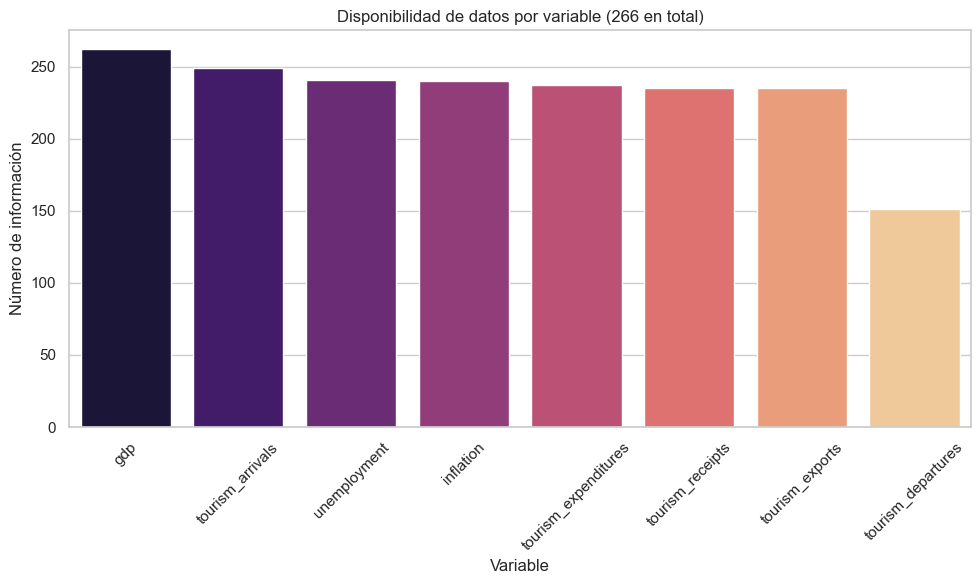

In [29]:
""" Gráfico para mostrar el número total de información del dataset y su distribución """

info_paises = df['country'].nunique() # Con el método nunique() devolvemos el número de valores únicos en una columna o dataframe.
print(f"🌎 Número total de información en el dataset: {info_paises}")

# Columnas que queremos analizar
columnas = ['tourism_receipts', 'tourism_arrivals', 'tourism_exports',
            'tourism_departures', 'tourism_expenditures', 'gdp', 'inflation', 'unemployment']

# Contar países únicos con datos disponibles en cada columna
conteo_por_columna = df.groupby('country')[columnas].count().gt(0).sum().sort_values(ascending=False)

# Mostrar el conteo
print(conteo_por_columna)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_por_columna.index, y=conteo_por_columna.values, palette='magma')

plt.title(f'Disponibilidad de datos por variable ({info_paises} en total)')
plt.xlabel('Variable')
plt.ylabel('Número de información')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
# Filtramos por país: Colombia
df_colombia = df[df['country'] == 'Colombia'].copy()

df_colombia.head()

In [22]:
# Método shape para identificar el tamaño del conjunto de datos
df_colombia.shape

print("El número de observaciones es: ", df_colombia.shape[0])
print("El número de atributos es: ", df_colombia.shape[1])

El número de observaciones es:  25
El número de atributos es:  11


In [23]:
""" Usamos el método info para consultar información, como el número de registros (observaciones) y de columnas (atributos), 
    también el número de registros no nulos y el tamaño que ocupa el df en memoria """

df_colombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 45 to 6429
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               25 non-null     object 
 1   country_code          25 non-null     object 
 2   year                  25 non-null     int64  
 3   tourism_receipts      22 non-null     float64
 4   tourism_arrivals      22 non-null     float64
 5   tourism_exports       22 non-null     float64
 6   tourism_departures    21 non-null     float64
 7   tourism_expenditures  22 non-null     float64
 8   gdp                   25 non-null     float64
 9   inflation             25 non-null     float64
 10  unemployment          24 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.3+ KB


In [ ]:
# Usamos el método dtypes que permite ver el tipo de dato de cada una de las columnas
df_colombia.dtypes 

## 📄 **Análisis Univariado**

In [4]:
# Datos nulos - Con este método podemos observar la cantidad de valores nulos por columna
df_colombia.isnull().sum()

country                 0
country_code            0
year                    0
tourism_receipts        3
tourism_arrivals        3
tourism_exports         3
tourism_departures      4
tourism_expenditures    3
gdp                     0
inflation               0
unemployment            1
dtype: int64

In [5]:
# Para mostrar el porcentaje de nulos por columna

serie_1 = df_colombia.isna().sum()

for column in serie_1.index:
    por = 100*serie_1[column]/df_colombia.shape[0]
    print(f"El porcentaje de nulos en la columna {column} es: {por:.2f}%")

El porcentaje de nulos en la columna country es: 0.00%
El porcentaje de nulos en la columna country_code es: 0.00%
El porcentaje de nulos en la columna year es: 0.00%
El porcentaje de nulos en la columna tourism_receipts es: 12.00%
El porcentaje de nulos en la columna tourism_arrivals es: 12.00%
El porcentaje de nulos en la columna tourism_exports es: 12.00%
El porcentaje de nulos en la columna tourism_departures es: 16.00%
El porcentaje de nulos en la columna tourism_expenditures es: 12.00%
El porcentaje de nulos en la columna gdp es: 0.00%
El porcentaje de nulos en la columna inflation es: 0.00%
El porcentaje de nulos en la columna unemployment es: 4.00%


In [ ]:
# En esta parte podemos visualizar directamente el porcentaje de nulos. A diferencia del método "df_colombia.isnull().sum()" que nos muestra la cantidad.
serie_1 = df_colombia.isna().sum()
100*serie_1/df_colombia.shape[0]

In [ ]:
# Con este método podemos ver las estadísticas de la columna, pero no están relacionadas unas con otras
df_colombia.describe()

In [ ]:
# Obtenemos algunas estadísticas básicas para todos los atributos, incluyendo 'all' nos muestra las variables categoricas para describirlas
df_colombia.describe(include='all')

In [ ]:
# Obtenemos estadísticas básicas para los atributos categóricos
df_colombia.describe(include='object')

In [ ]:
# Obtenemos estadísticas básicas para los atributos númericos con decimales
df_colombia.describe(include='float')

In [ ]:
# Obtenemos estadísticas básicas para los atributos enteros
df_colombia.describe(include='int')

## 📊 **Histogramas Análisis Univariado**

In [ ]:
# Gráfico de barras para datos categóricos

plt.figure(figsize=(10,5))
sns.countplot(data=df_colombia, x='country', color='yellow')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Distribución de países en el dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Histograma de todos los atributos (númericos)

num_bins = 30
for column in df_colombia.columns:
    if df_colombia[column].dtype != 'object' and df_colombia[column].notna().sum() >0:
        plt.figure(figsize=(6,6))
        sns.histplot(data = df_colombia,
            x = column,
            bins = num_bins,
            color = 'red',
            fill = True,
            stat = 'count',        #'count' muestra el número de observaciones.
            kde = True)
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

        plt.xlabel(column) #Texto en el eje x.
        plt.ylabel('Cuentas')  #Texto en el eje y.
        plt.title(f'Histograma de {column}')  #Título del gráfico.
        plt.show()

## 🔍 **Análisis Univariado de Histogramas Relevantes**

Estas gráficas nos permitieron observar la distribución de los datos, identificar concentraciones, tendencias y posibles valores atípicos.

- **gdp (Producto Interno Bruto):**  
  El PIB muestra una tendencia de crecimiento a lo largo del tiempo, hasta la curva KDE con pendiente hacia la derecha, indicando una tendencia creciente en la economía del país.

- **inflation (Inflación):**  
  Los valores de inflación se mantienen entre el 2% y el 11%, con una mayor concentración alrededor del 5%. Esto indica que, en general, la inflación ha sido relativamente estable en el período analizado.

- **unemployment (Desempleo):**  
  La mayoría de las tasas de desempleo se ubican entre el 8% y el 13%. Sin embargo, hay algunos años con tasas mucho más altas, cercanas al 20%, que aparecen como valores extremos. Esto refleja momentos críticos, como la pandemia, que afectaron fuertemente el empleo.

# 📄 **Análisis Bivariado**

#### Es una técnica estadística que se aplica a un par de variables (atributos o características) para determinar la relación empírica entre ellas.

## 📊 **Matriz de correlación**

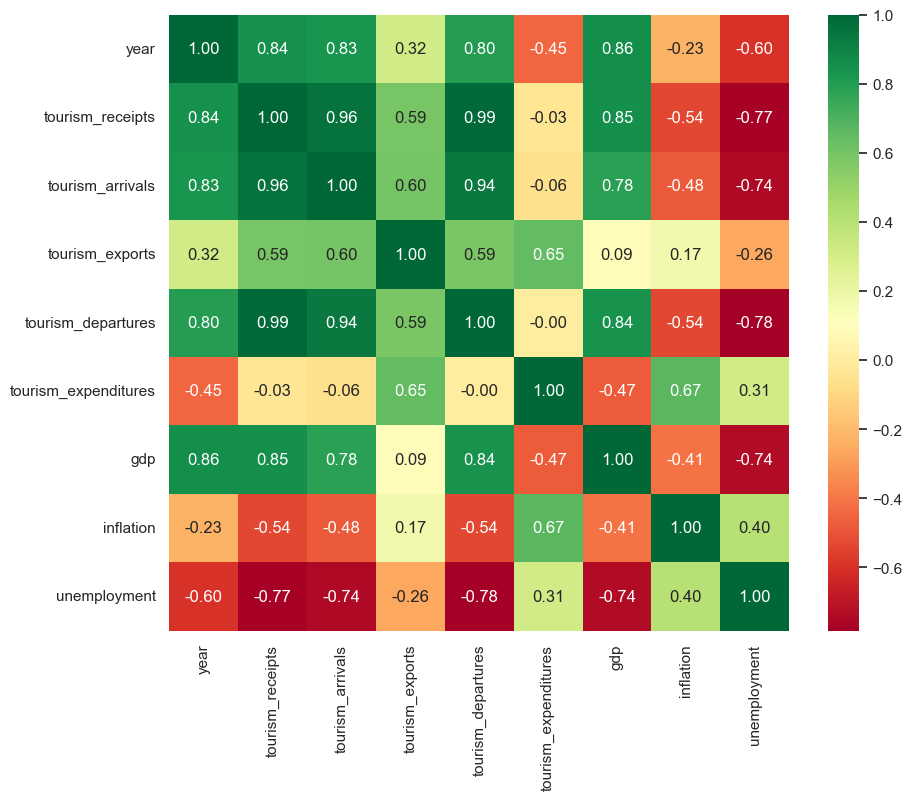

In [ ]:
# Matriz de correlación - Heatmap

df_colombia_numeric = df_colombia.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_colombia_numeric.corr(),annot=True,cmap='RdYlGn',fmt='0.2f')

## **Análisis Matriz de Correlación**

La matriz de correlación muestra cómo se relacionan entre sí las variables numéricas del dataset. Los valores oscilan entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta). Algunas observaciones relevantes son:

- **Alta correlación positiva:**
  - **tourism_receipts**, **tourism_arrivals** y **tourism_departures** están fuertemente correlacionadas entre sí (>= 0.94). Esto indica que a mayor número de turistas que llegan o salen, mayores son los ingresos por turismo. Tiene sentido, ya que estos indicadores están directamente vinculados a la actividad turística del país.
   - **gdp** tiene alta correlación con **tourism_receipts** , **tourism_arrivals** y **tourism_departures**, esto indica que un buen desempeño turístico impulsa la economía.
  
- **Correlaciones negativas destacadas:**
  - **unemployment** tiene correlaciones negativas fuertes con **tourism_receipts** (-0.77), **tourism_arrivals** (-0.74) y **gdp** (-0.74), lo cual sugiere que el desempleo tiende a disminuir cuando hay mayor actividad económica y turística.
  - **inflation** también tiene una relación inversa con varias variables clave como **tourism_arrivals** (-0.48) y **gdp** (-0.41), lo que podría indicar que altos niveles de inflación están relacionados con menor desempeño económico y menor atracción turística.

### ✅ **Conclusión:**
El turismo y el desempeño económico están muy conectados. Es decir, a mayor cantidad de turistas (tanto llegadas como salidas), se generan más ingresos, se impulsa el PIB y disminuye el desempleo. Por el contrario, variables como la inflación y el desempleo tienden a tener efectos negativos sobre la actividad turística.

### **a. Gráfico de dispersión (scatter plot)**

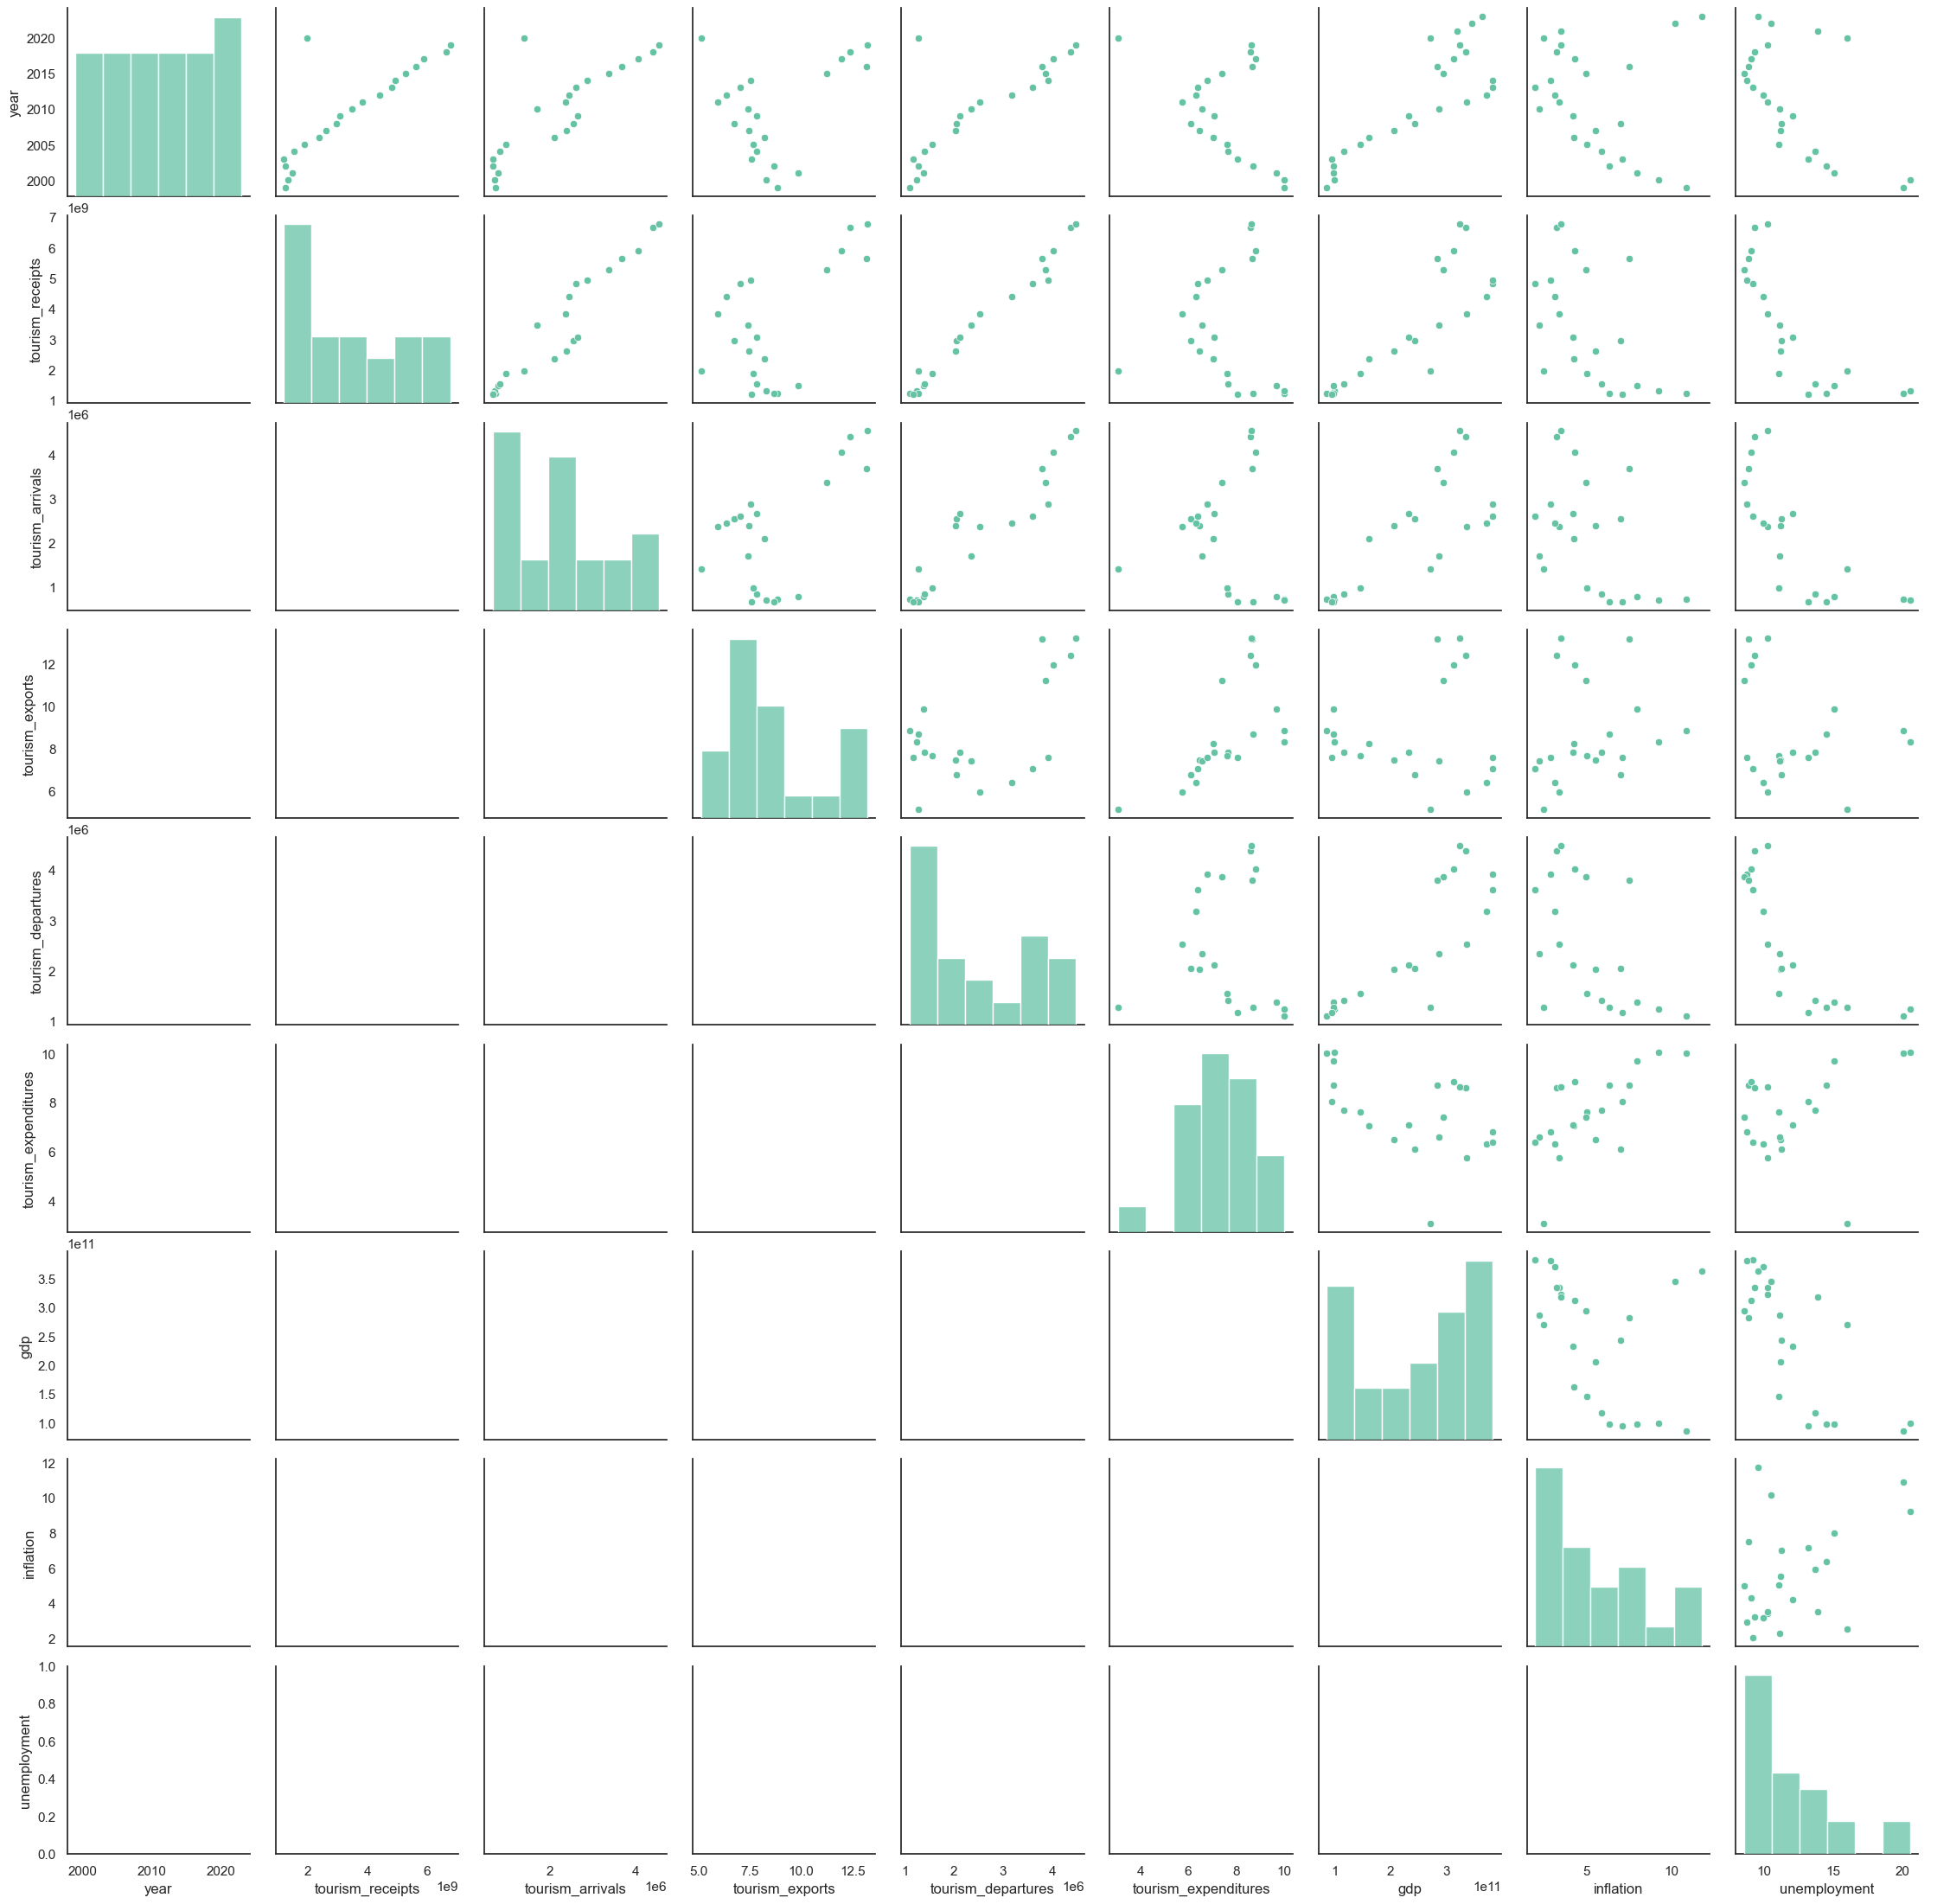

In [13]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_colombia,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)

g.add_legend()
plt.show()

In [ ]:
# Scatterplot para mirar la relación del ingreso total que Colombia generó por turismo internacional, medido en dólares vs el año

variable_x = 'year'
variable_y = 'tourism_receipts'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del número total de turistas internacionales que llegaron a Colombia, medido en unidades de conteo vs el año

variable_x = 'year'
variable_y = 'tourism_arrivals'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del porcentaje del total de las exportaciones de Colombia derivado de los ingresos por turismo internacional vs el año

variable_x = 'year'
variable_y = 'tourism_exports'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del número de ciudadanos o residentes de Colombia que viajaron al extranjero por turismo vs el año

variable_x = 'year'
variable_y = 'tourism_departures'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del valor total de todos los bienes y servicios producidos en un país, expresado en dólares vs el año

variable_x = 'year'
variable_y = 'gdp'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del cambio porcentual anual en el precio promedio de los bienes y servicios en Colombia vs el año

variable_x = 'year'
variable_y = 'inflation'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Scatterplot para mirar la relación del porcentaje de personas dentro de la población económicamente activa que están desempleadas pero están buscando trabajo activamente vs el año

variable_x = 'year'
variable_y = 'unemployment'

x_values = df_colombia[variable_x]
y_values = df_colombia[variable_y]

sns.scatterplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

## 🔎 **Detección de Valores Atípicos (Outliers)**

In [88]:
def outliers(dx, atributo):

    arr1 = dx[atributo].dropna().values

    # Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=arr1, color='orange')
    plt.title(f'Boxplot de {atributo}')
    plt.xlabel(atributo)
    plt.show()
    
    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior (límites)
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Valores atípicos
    outliers_l = arr1[(arr1 <= lower_bound)]
    outliers_u = arr1[(arr1 >= upper_bound)]
    print(f'🔻Observaciones atípicas inferiores en {atributo}: {outliers_l}')
    print(f'🔺Observaciones atípicas superiores en {atributo} : {outliers_u}')

    return outliers_l, outliers_u

In [ ]:
for column in df_colombia.columns:
    if df_colombia[column].dtype != 'object':
        outliers(df_colombia, column)

### **Análisis de valores atípicos (Outliers)**

Se aplicó el método del **rango intercuartílico (IQR)** para identificar observaciones atípicas. Esta técnica permite detectar valores que se encuentran significativamente por fuera del rango esperado (por debajo de Q1 - 1.5IQR o por encima de Q3 + 1.5*IQR).

Resumen de los outliers detectados:

- **tourism_exports**:
  - Se identificaron valores atípicos superiores: esto indica que en uno o dos años el porcentaje de exportaciones relacionadas al turismo fue significativamente más alto que en el resto del período. Puede tratarse de un año excepcional con muy buen desempeño del turismo en el comercio.

- **tourism_expenditures**:
  - Hay una observación atípica inferior: esto sugiere que en ese año el gasto de los colombianos en el exterior fue inusualmente bajo, posiblemente por restricciones económicas o de movilidad (como en el caso de la pandemia).

- **unemployment**:
  - Se identificó una observación atípica superior: este valor extremadamente alto de desempleo podría deberse a un evento económico crítico en el país, como una crisis económica o el impacto del COVID-19 en el empleo.

# 🧼 **Limpieza**

In [32]:
""" Detección de problemas con el conjunto de datos: 
    valores faltantes, valores erróneos, etc."""

# Datos repetidos - Con este método podemos visualizar la cantidad de duplicados en todo el Dataframe
df_colombia.duplicated().sum()

np.int64(0)

In [ ]:
df_colombia.info()

In [ ]:

serie_original = df_colombia.isna().sum()

for column in serie_original.index:
    por = 100*serie_original[column]/df_colombia.shape[0]
    print(f"El porcentaje de nulos en la columna {column} es {serie_original[column]} y el porcentaje es: {por:.2f}%")

## 📗 **Solución a Problemas Encontrados**

In [16]:
# Es recomendable hacer una copia (profunda) del Dataframe original antes de modificarlo.

df_colombia_clean = df_colombia.copy()

In [ ]:
# Para eliminar duplicados, en caso de que los hubiera:

df_colombia_clean = df_colombia_clean.drop_duplicates()
df_colombia_clean.info()

In [18]:
""" Los tipos de datos corresponden a su información
    por lo que no hubo necesidad de cambiar tipos de datos en las columnas """

df_colombia_clean.dtypes

country                  object
country_code             object
year                      int64
tourism_receipts        float64
tourism_arrivals        float64
tourism_exports         float64
tourism_departures      float64
tourism_expenditures    float64
gdp                     float64
inflation               float64
unemployment            float64
dtype: object

## ⚙️ **Manejo de Datos Faltantes y/o Anómalos**

In [19]:
df_colombia_clean.isna().sum()

country                 0
country_code            0
year                    0
tourism_receipts        3
tourism_arrivals        3
tourism_exports         3
tourism_departures      4
tourism_expenditures    3
gdp                     0
inflation               0
unemployment            1
dtype: int64

In [ ]:
# Para mostrar el porcentaje de nulos por columna

serie_1 = df_colombia_clean.isna().sum()

for column in serie_1.index:
    por = 100*serie_1[column]/df_colombia_clean.shape[0]
    print(f"El porcentaje de nulos en la columna {column} es {serie_1[column]} y el porcentaje es: {por:.2f}%")

## **Filtramos para identificar cuales son las columnas que tienen valores nulos, identificamos que están en el año 2006 y 2021 hasta 2023**

In [22]:
# Aquí identificamos que en los años 2021 al 2023 es dónde estan la mayoría de datos faltantes

df_colombia_1 = df_colombia_clean[df_colombia_clean['tourism_departures'].isna()]

df_colombia_1.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
1907,Colombia,COL,2006,2.370000e+09,2096000.0,8.211566,NaN,7.045665,1.617930e+11,4.293424,NaN
5897,Colombia,COL,2021,NaN,NaN,NaN,NaN,NaN,3.185246e+11,3.495058,13.898
6163,Colombia,COL,2022,NaN,NaN,NaN,NaN,NaN,3.453299e+11,10.177231,10.547
6429,Colombia,COL,2023,NaN,NaN,NaN,NaN,NaN,3.634938e+11,11.735904,9.603


## Para el dato faltante en la columna **unemployment** podemos llenarlo sacando un promedio, recordemos que esa columna tiene información en porcentaje %
## 👉 **Uso de Groupby**

In [ ]:
df_colombia_clean.groupby('year')['unemployment'].value_counts()

In [26]:
""" Dado que 2006 es el único dato faltante:
    podemos sacar un promedio entre 2005 y 2007 """

def promedio(num1, num2):
    return (num1 + num2) / 2

numero1 = 11.062
numero2 = 11.204
promedio_resultado = promedio(numero1, numero2)
print(f"El promedio de {numero1} y {numero2} es: {promedio_resultado}")

El promedio de 11.062 y 11.204 es: 11.133


## **Identificamos que el porcentaje promedio de 2005 y 2007 para el año 2006 es: 11.133%**

In [27]:
## Vamos a reemplazar los NaN en la columna 'unemployment' por '11.133'
df_colombia_clean['unemployment'] = df_colombia_clean['unemployment'].fillna('11.133')

In [ ]:
## Vamos a mostrar nuevamente el porcentaje de nulos por columna para saber si se realizó el cambio correctamente

serie_1 = df_colombia_clean.isna().sum()

for column in serie_1.index:
    por = 100*serie_1[column]/df_colombia_clean.shape[0]
    print(f"El porcentaje de nulos en la columna {column} es {serie_1[column]} y el porcentaje es: {por:.2f}%")

In [ ]:
"""Rellenemos el valor de **tourism_departures** para el año 2006 sacando un promedio del 2005 y 2007 de nuevo, 
    el valor de esta columna esta expresada en número de personas""" 

df_colombia_clean.groupby('year')['tourism_departures'].value_counts()

In [30]:
def promedio(num1, num2):
    return (num1 + num2) / 2

numero1 = 1553000.0
numero2 = 2028000.0
promedio_resultado = promedio(numero1, numero2)
print(f"El promedio de {numero1} y {numero2} es: {promedio_resultado}")

El promedio de 1553000.0 y 2028000.0 es: 1790500.0


## **Aquí queremos reemplazar únicamente el valor de NaN en 2006 y no en 2021 al 2023, para ello usamos la condición lógica .loc[] para modificar solo la fila del año 2006**

In [31]:
## Vamos a reemplazar los NaN en la columna 'tourism_departures' del año 2006  por '1790500.0'
df_colombia_clean.loc[df_colombia_clean['year'] == 2006, 'tourism_departures'] = 1790500.0

In [ ]:
# Verificamos que se hayan hecho los cambios
df_colombia_clean.isna().sum()

## **Ahora solo deben quedar los años 2021 al 2023 con información NaN:**

In [34]:
df_colombia_2 = df_colombia_clean[df_colombia_clean['tourism_receipts'].isna()]

df_colombia_2.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
5897,Colombia,COL,2021,NaN,NaN,NaN,NaN,NaN,3.185246e+11,3.495058,13.898
6163,Colombia,COL,2022,NaN,NaN,NaN,NaN,NaN,3.453299e+11,10.177231,10.547
6429,Colombia,COL,2023,NaN,NaN,NaN,NaN,NaN,3.634938e+11,11.735904,9.603


### **Para diligenciar las columnas NaN correspondiente a los años 2021 al 2023, consultamos la información de la Encuesta de Gasto Interno en Turismo - EGIT, realizada por el DANE, para cada año.**

In [35]:
## Vamos a reemplazar los NaN en la columna 'tourism_receipts' del año 2021 al 2023
df_colombia_clean.loc[df_colombia_clean['year'] == 2021, 'tourism_receipts'] = 2.94e9
df_colombia_clean.loc[df_colombia_clean['year'] == 2022, 'tourism_receipts'] = 6.22e9
df_colombia_clean.loc[df_colombia_clean['year'] == 2023, 'tourism_receipts'] = 8.55e9

## Vamos a reemplazar los NaN en la columna 'tourism_arrivals' del año 2021 al 2023
df_colombia_clean.loc[df_colombia_clean['year'] == 2021, 'tourism_arrivals'] = 2.13e6
df_colombia_clean.loc[df_colombia_clean['year'] == 2022, 'tourism_arrivals'] = 4.52e6
df_colombia_clean.loc[df_colombia_clean['year'] == 2023, 'tourism_arrivals'] = 5.86e6

## Vamos a reemplazar los NaN en la columna 'tourism_exports' del año 2021 al 2023
df_colombia_clean.loc[df_colombia_clean['year'] == 2021, 'tourism_exports'] = 0.92
df_colombia_clean.loc[df_colombia_clean['year'] == 2022, 'tourism_exports'] = 1.8
df_colombia_clean.loc[df_colombia_clean['year'] == 2023, 'tourism_exports'] = 2.1

## Vamos a reemplazar los NaN en la columna 'tourism_departures' del año 2021 al 2023
df_colombia_clean.loc[df_colombia_clean['year'] == 2021, 'tourism_departures'] = 1.275e6
df_colombia_clean.loc[df_colombia_clean['year'] == 2022, 'tourism_departures'] = 3.2e6
df_colombia_clean.loc[df_colombia_clean['year'] == 2023, 'tourism_departures'] = 3.5e6

## Vamos a reemplazar los NaN en la columna 'tourism_expenditures' del año 2021 al 2023
df_colombia_clean.loc[df_colombia_clean['year'] == 2021, 'tourism_expenditures'] = 2.94e9
df_colombia_clean.loc[df_colombia_clean['year'] == 2022, 'tourism_expenditures'] = 6.22e9
df_colombia_clean.loc[df_colombia_clean['year'] == 2023, 'tourism_expenditures'] = 8.55e9

In [36]:
# Verificamos que se hayan hecho los cambios
df_colombia_clean.isna().sum()

country                 0
country_code            0
year                    0
tourism_receipts        0
tourism_arrivals        0
tourism_exports         0
tourism_departures      0
tourism_expenditures    0
gdp                     0
inflation               0
unemployment            0
dtype: int64

In [ ]:
df_colombia_clean.head(25)

## **Guardar el archivo tras la limpieza**

In [ ]:
# Guardar el dataframe limpio en un archivo csv
df_colombia_clean.to_csv('world_tourism_economy_data_clean', index=False)

## ✅ **Análisis 1:** ¿Cómo han evolucionado las entradas de turistas y salidas de residentes en Colombia desde 1999 a 2020?



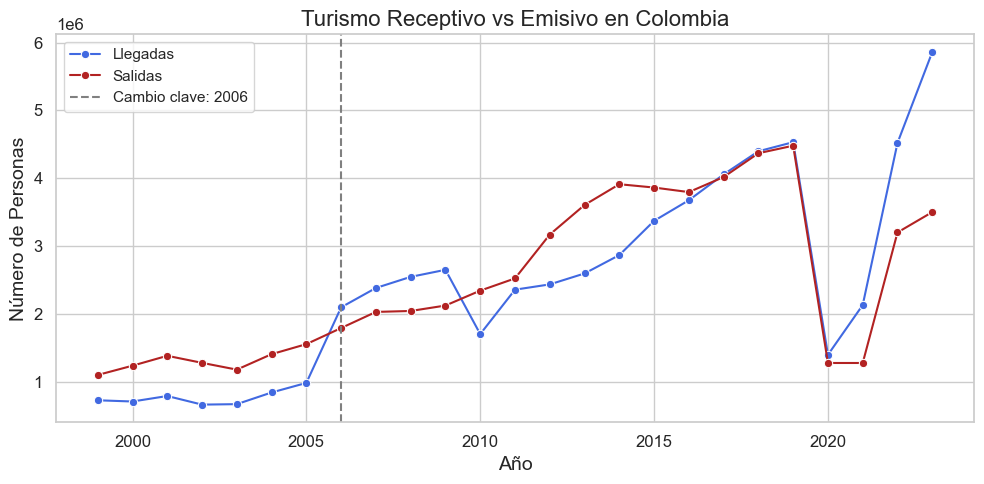

In [40]:
# Estilo de la gráfica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Graficar turismo receptivo vs emisivo
plt.figure()
sns.lineplot(data=df_colombia_clean, x="year", y="tourism_arrivals", label="Llegadas", marker="o", color="royalblue")
sns.lineplot(data=df_colombia_clean, x="year", y="tourism_departures", label="Salidas", marker="o", color="firebrick")

# Línea vertical en el año 2007
plt.axvline(x=2006, color='gray', linestyle='--', linewidth=1.5, label='Cambio clave: 2006')

# Títulos y etiquetas
plt.title("Turismo Receptivo vs Emisivo en Colombia")
plt.xlabel("Año")
plt.ylabel("Número de Personas")
plt.legend()
plt.tight_layout()
plt.show()

###  **🕵️‍♂️ Análisis:** Desde 1999 hasta aproximadamente 2006, las salidas de colombianos al exterior fueron más altas que las llegadas de turistas al país. Desde 2006, Colombia recibe más turistas internacionales de los que salen, esto nos indica que Colombia está teniendo mayor atractivo como destino. En 2020, ambas cifras caen por la pandemia. Podríamos concluir que Colombia se ha consolidado como destino turístico desde 2006.

## ✅ **Análisis 2:** ¿Por qué hubo un crecimiento en las exportaciones de Colombia entre 2015 y 2020?

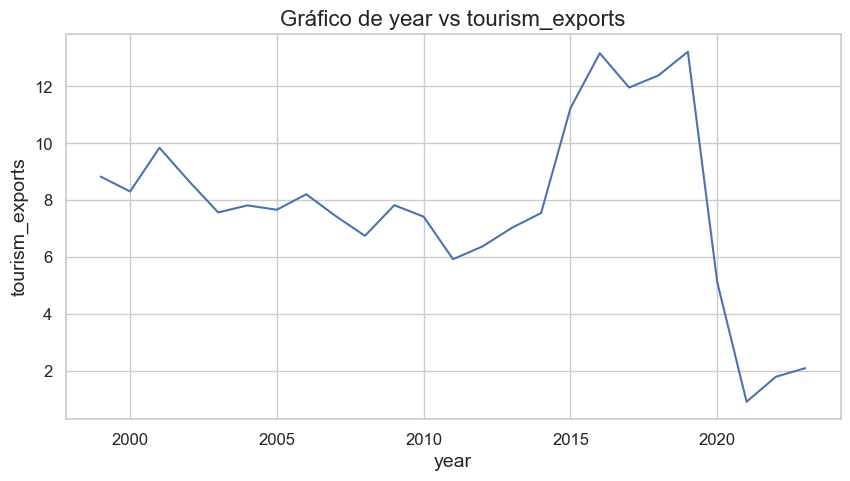

In [41]:
# Gráfico lineal para mirar la relación del porcentaje del total de las exportaciones de Colombia derivado de los ingresos por turismo internacional vs el año

variable_x = 'year'
variable_y = 'tourism_exports'

x_values = df_colombia_clean[variable_x]
y_values = df_colombia_clean[variable_y]

sns.lineplot(x=x_values, y=y_values)

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

###  **🕵️‍♂️ Análisis:** El crecimiento de las exportaciones de Colombia, en parte debido a los ingresos por turismo internacional entre 2015 y 2020, se debe a una combinación de factores, incluyendo la expansión de la oferta turística, el aumento de conexiones aéreas, inversiones en infraestructura y una mejor promoción de Colombia en el exterior.

## ✅ **Análisis 3:** ¿Por qué el PIB disminuyó entre 2015 y 2020 si estaba en ascendencia en años anteriores?

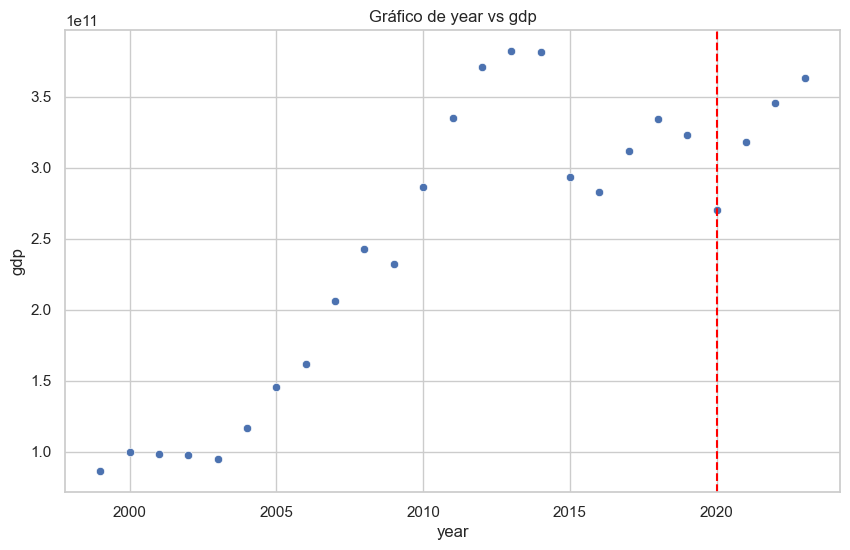

In [42]:
# Histograma para mirar la relación del valor total de todos los bienes y servicios producidos en un país, expresado en dólares vs el año

variable_x = 'year'
variable_y = 'gdp'

x_values = df_colombia_clean[variable_x]
y_values = df_colombia_clean[variable_y]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=y_values)

# Línea vertical en 2020
plt.axvline(x=2020, color='red', linestyle='--', linewidth=1.5, label='Pandemia (2020)')

# Agregar etiquetas a los ejes
plt.xlabel(variable_x)
plt.ylabel(variable_y)

# Agregar un título al gráfico
plt.title('Gráfico de ' + variable_x + ' vs ' + variable_y)

# Mostrar el gráfico
plt.grid(True)
plt.show()

### **🕵️‍♂️ Análisis:** El Producto Interno Bruto tuvo un período de crecimiento hasta el 2015, pero luego, entre 2015 y 2020, hubo una tendencia a la baja. Varias razones contribuyeron a este descenso, incluyendo factores económicos globales, crisis políticas y el impacto de la pandemia COVID-19 en el 2020, especialmente en el segundo trimestre del año. Colombia presentó una caída histórica del PIB del 6,8% en 2020 debido a la crisis económica causada por la pandemia. Y cambios en sectores claves como el petrolero.

### **Crisis económica global:** En América Latina y el Caribe, el período 2014-2020 se caracterizó por un menor crecimiento económico, lo que afectó el PIB. **Fuente:** CEPAL, Comisión Económica Para América Latina y el Caribe (2019)

## ✅ **Análisis 4:** ¿Cómo ha evolucionado la relación entre el PIB y los ingresos por turismo en Colombia desde 1999 hasta 2023?

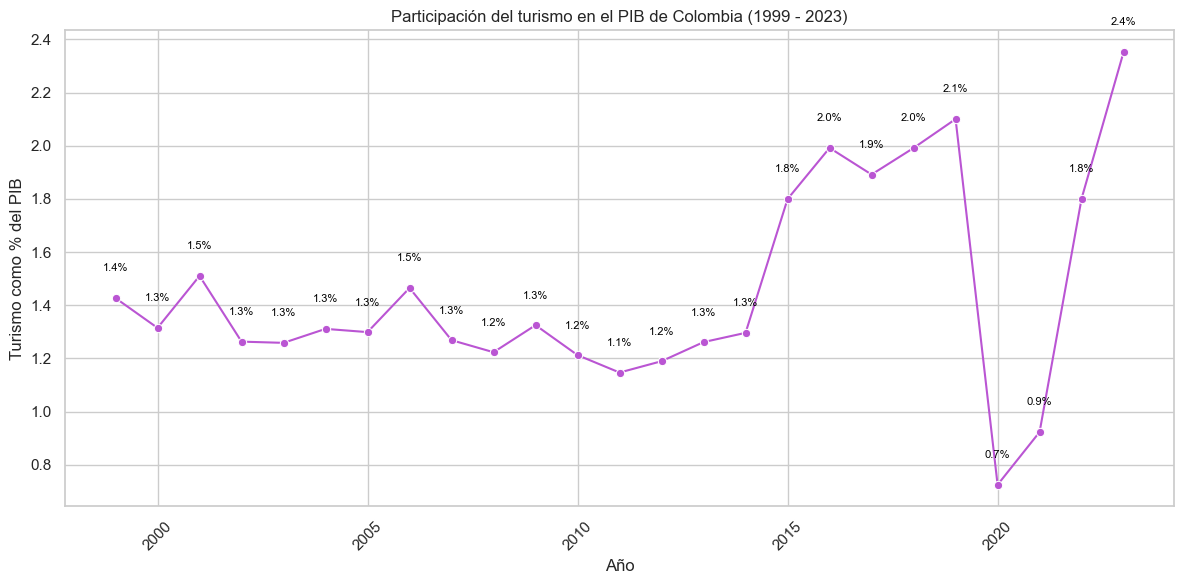

In [43]:
# Filtrar datos de Colombia y eliminar filas sin datos relevantes
colombia = df_colombia_clean[df_colombia_clean['gdp'].notna() & df_colombia_clean['tourism_receipts'].notna()]

# Estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=colombia['year'], y=(colombia['tourism_receipts'] / colombia['gdp']) * 100, marker='o', color='mediumorchid')

# Decorar el gráfico
plt.title("Participación del turismo en el PIB de Colombia (1999 - 2023)")
plt.xlabel("Año")
plt.ylabel("Turismo como % del PIB")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar valores en cada punto
for i, row in colombia.iterrows():
    ratio = (row['tourism_receipts'] / row['gdp']) * 100
    plt.text(row['year'], ratio + 0.1, f"{ratio:.1f}%", ha='center', fontsize=8, color='black')

plt.show()


### **🕵️‍♂️ Análisis:** La gráfica muestra la proporción que representan los ingresos por turismo internacional respecto al Producto Interno Bruto (PIB) colombiano desde 1999 hasta 2023, expresada en porcentaje.

### - Entre 1999 y 2014, la participación del turismo en el PIB se mantuvo estable, con valores entre el 1.1% y 1.5%. Esta estabilidad sugiere una influencia constante pero limitada del turismo en la economía nacional durante esos años.
### - A partir de 2015, se observa un aumento significativo en la participación del turismo, alcanzando valores entre el 1.8% y el 2.1% hasta el año 2019.
### - En 2020, se registra una caída abrupta hasta el 0.7%, como consecuencia directa del impacto de la pandemia, que redujo bastante la llegada de turistas y la actividad económica del sector.
### - Desde 2021 hasta 2023, se nota una recuperación acelerada. Esto refleja la reactivación del sector turístico y su creciente importancia en la economía post-pandemia.
### En resumen, la relación entre el turismo y el PIB ha evolucionado positivamente en los últimos años, lo cual evidencia que el turismo está adquiriendo un papel más relevante dentro del panorama económico colombiano.



## ✅ **Análisis 5:** ¿Cómo ha evolucionado el número de salidas de turistas colombianos al extranjero desde 1999?

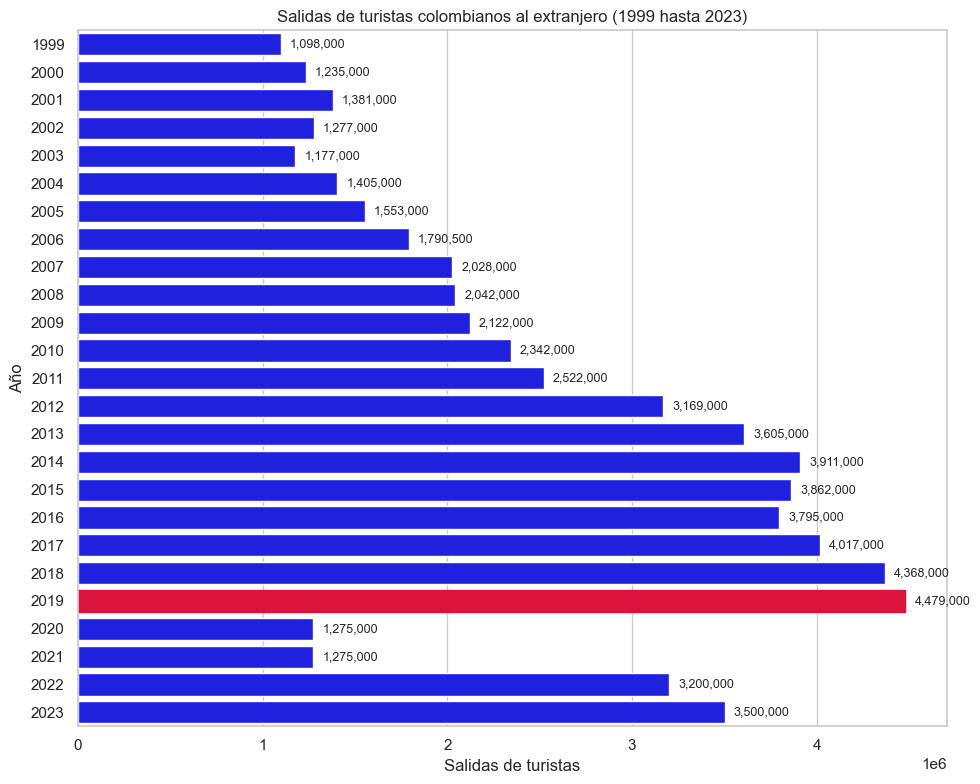

In [44]:
# Filtrar datos de Colombia y eliminar registros sin salidas
colombia = df_colombia_clean.groupby('year', as_index=False)['tourism_departures'].sum()

# Ordenar por año (opcional, por claridad)
colombia = colombia.sort_values(by='year')

# Encontrar el año con más salidas
max_departure = colombia.loc[colombia['tourism_departures'].idxmax()]
año_max = int(max_departure['year'])

# Configurar estilo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Gráfico de barras horizontales
barras = sns.barplot(data=colombia, y='year', x='tourism_departures', color='blue', orient='h')

# Añadir etiquetas al lado izquierdo de cada barra
for bar in barras.patches:
    valor = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    barras.annotate(f'{int(valor):,}', xy=(valor + 50000, y_pos), va='center', fontsize=9)

# Resaltar el año con más salidas
for bar in barras.patches:
    if int(bar.get_y() + bar.get_height()/2) == colombia[colombia['year'] == año_max].index[0]:
        bar.set_color('crimson')

# Etiquetas y estilo
plt.title("Salidas de turistas colombianos al extranjero (1999 hasta 2023)")
plt.xlabel("Salidas de turistas")
plt.ylabel("Año")
plt.tight_layout()
plt.show()


### **🕵️‍♂️ Análisis:** Podemos ver que el número de salidas al extranjero creció de forma sostenida desde 1999 hasta alcanzar un pico histórico en 2019 con más de 4 millones. Luego cayó fuertemente por la pandemia en 2020 y 2021, pero en 2022 y 2023 comenzó a recuperarse, aunque aún no llega al máximo alcanzado antes del COVID


## ✅ **Análisis 6:** ¿En qué año Colombia recibió el mayor ingreso por turismo y cuánto fue?

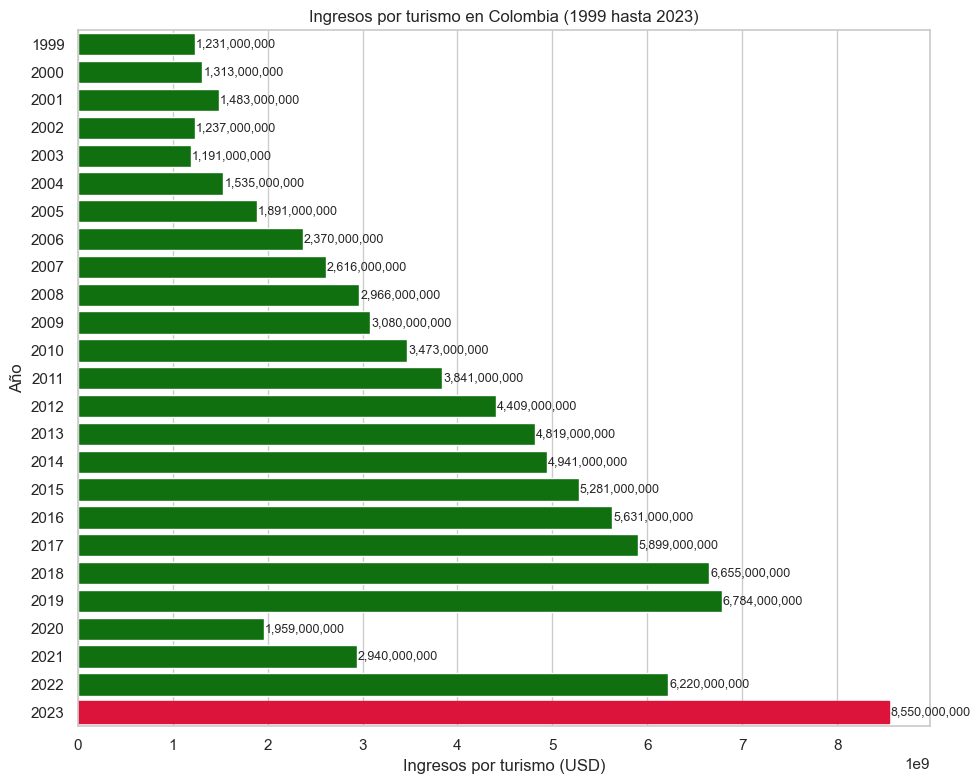

In [45]:

# Filtrar datos de Colombia y eliminar registros sin ingresos
colombia = df_colombia_clean[df_colombia_clean['tourism_receipts'].notna()].sort_values(by='year')

# Encontrar el año con más ingresos
max_ingresos = colombia.loc[colombia['tourism_receipts'].idxmax()]
año_max = int(max_ingresos['year'])

# Configurar estilo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Gráfico de barras horizontales
barras = sns.barplot(data=colombia, y='year', x='tourism_receipts', color='Green', orient='h')

# Añadir etiquetas al lado derecho de cada barra
for bar in barras.patches:
    valor = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    barras.annotate(f'{int(valor):,}', xy=(valor + 10000000, y_pos), va='center', fontsize=9)

# Resaltar la barra del año con mayor ingreso
for bar, year in zip(barras.patches, colombia['year']):
    if int(year) == año_max:
        bar.set_color('crimson')

# Etiquetas y estilo
plt.title("Ingresos por turismo en Colombia (1999 hasta 2023)")
plt.xlabel("Ingresos por turismo (USD)")
plt.ylabel("Año")
plt.tight_layout()
plt.show()


### **🕵️‍♂️ Análisis:** Podemos ver cómo han evolucionado los ingresos por turismo en Colombia desde 1999. Desde comienzos de los 2000 hasta 2019, los ingresos fueron aumentando año tras año, alcanzando un pico importante en 2019 con más de 6.700 millones de dólares. En 2020, por la pandemia, los ingresos cayeron a menos de 2.000 millones, pero en los años siguientes comenzó la recuperación. Lo más destacado es que en 2023, Colombia alcanzó su valor más alto en toda la serie: más de 8.500 millones de dólares, lo que muestra que el turismo no solo se recuperó, sino que superó con fuerza los niveles previos al COVID.

## ✅ **Análisis 7:** ¿Cuáles fueron los años con mayores ingresos por turismo internacional en Colombia?

C:\Users\danie\AppData\Local\Temp\ipykernel_1628\3675659900.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='year', y='tourism_receipts', palette='viridis')


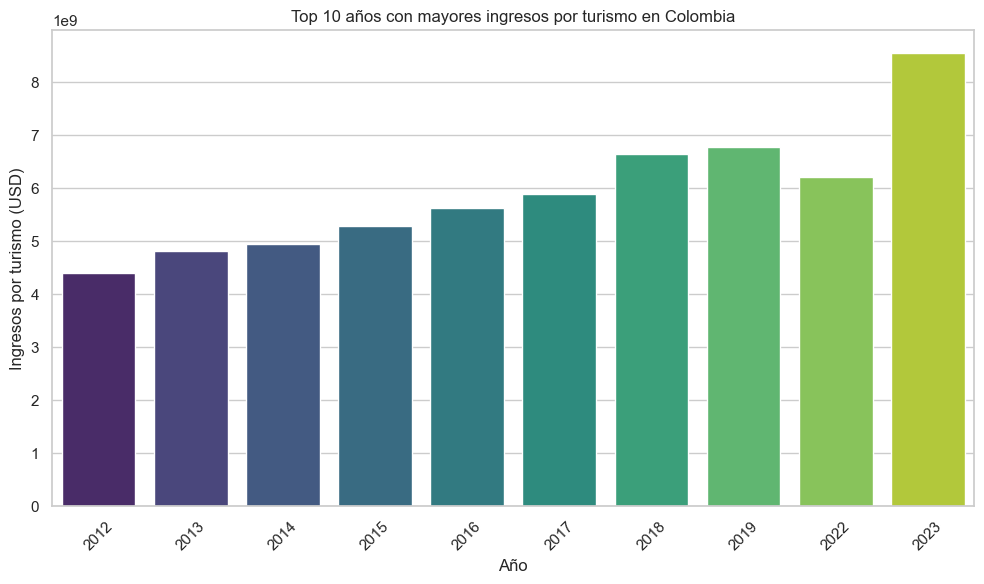

In [46]:
# Asegurarse de que los datos estén bien agregados por año
ingresos_por_año = df_colombia_clean.groupby('year', as_index=False)['tourism_receipts'].sum()

# Ordenar para ver los años con mayores ingresos
ingresos_ordenados = ingresos_por_año.sort_values(by='tourism_receipts', ascending=False)

# Visualizar los 10 años con mayores ingresos por turismo
top_10 = ingresos_ordenados.head(10)

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='year', y='tourism_receipts', palette='viridis')

plt.title('Top 10 años con mayores ingresos por turismo en Colombia')
plt.xlabel('Año')
plt.ylabel('Ingresos por turismo (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **🕵️‍♂️ Análisis:** Este análisis muestra los 10 años en los que Colombia recibió mayores ingresos por turismo internacional, calculados en dólares estadounidenses. Se observa que los ingresos aumentaron sostenidamente hasta 2019, lo que refleja un crecimiento sostenido del sector turístico. Posteriormente, en 2020, hubo una fuerte caída debido al cierre de fronteras y restricciones de movilidad. A partir de 2022 vuelven a elevarse las cifras.



## ✅ **Análisis 8:** ¿Cuál fue el promedio de desempleo por década en Colombia?

C:\Users\danie\AppData\Local\Temp\ipykernel_1628\2776080343.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_unemployment, x='decade', y='unemployment', palette='Blues')


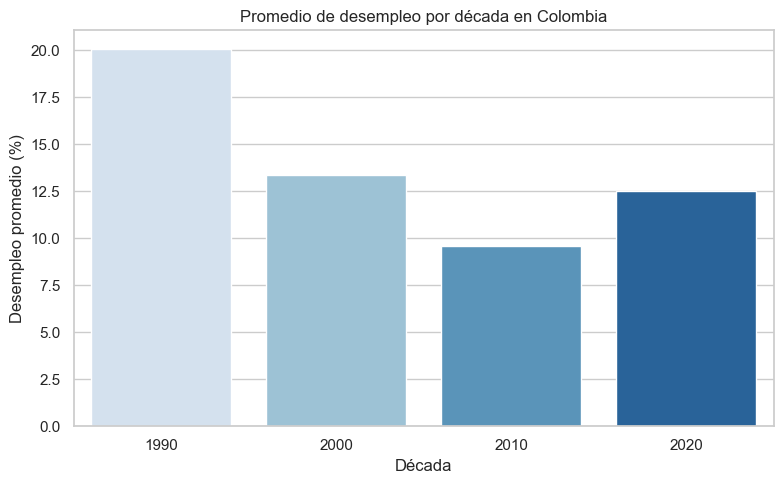

In [51]:
# Convertir a numérico y eliminar valores problemáticos
df_colombia_clean['unemployment'] = pd.to_numeric(df_colombia_clean['unemployment'], errors='coerce')
df_colombia_clean = df_colombia_clean.dropna(subset=['unemployment'])

# Crear columna de década
df_colombia_clean['decade'] = (df_colombia_clean['year'] // 10) * 10

# Agrupar por década y calcular promedio
df_unemployment = df_colombia_clean.groupby('decade', as_index=False)['unemployment'].mean()

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_unemployment, x='decade', y='unemployment', palette='Blues')

plt.title('Promedio de desempleo por década en Colombia')
plt.xlabel('Década')
plt.ylabel('Desempleo promedio (%)')
plt.tight_layout()
plt.show()


### **🕵️‍♂️ Análisis:** Se observa que el desempleo ha disminuido ligeramente desde la década del 2000 hasta la del 2010, en esta década, la implementación de programas de empleabilidad y el crecimiento de sectores como el turismo, los servicos y la tecnología ayudaron a este porcentaje. En la década actual (2020 a 2023) el promedio vuelve a incrementarse lieramente debido al fuerte impacto de la pandemia.

## ✅ **Análisis 9:** ¿Cómo han variado las llegadas y salidas de turistas por década?

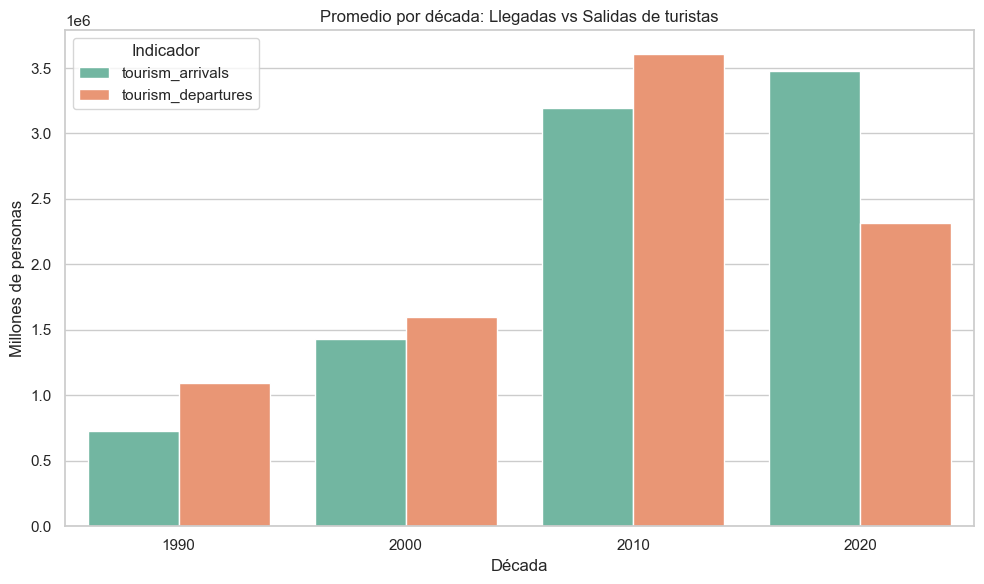

In [52]:
df_colombia_clean['decade'] = (df_colombia_clean['year'] // 10) * 10

df_movement = df_colombia_clean.groupby('decade', as_index=False)[['tourism_arrivals', 'tourism_departures']].mean()

df_melted = df_movement.melt(id_vars='decade', var_name='Indicador', value_name='Promedio')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='decade', y='Promedio', hue='Indicador', palette='Set2')

plt.title('Promedio por década: Llegadas vs Salidas de turistas')
plt.xlabel('Década')
plt.ylabel('Millones de personas')
plt.legend(title='Indicador')
plt.tight_layout()
plt.show()

### **🕵️‍♂️ Análisis:** Se observa que en las primeras décadas analizadas, el número de salidas era mayor que el de llegadas, lo cual indica que más colombianos salían del país a hacer turismo que los extranjeros que ingresaban. Esto indica que históricamente, más ciudadanos colombianos han salido del país por turismo que los turistas extranjeros que han ingresado.
### Aun así, puede observarse un crecimiento progresivo en las llegadas a lo largo del tiempo, lo cual señala una tendencia positiva en el atractivo turístico internacional de Colombia. En cambio, las salidas también aumentan, reflejando una mayor capacidad adquisitiva de los colombianos.



# **Conclusiones**

### A través del análisis de datos turísticos y económicos de Colombia entre 1999 y 2023, pudimos evidenciar que el turismo no solo ha crecido significativamente, sino que también se ha consolidado como un motor clave para el desarrollo económico del país. La alta correlación entre el turismo y variables como el PIB y el desempleo demuestra su impacto directo en la estabilidad y crecimiento nacional. A pesar de los desafíos, como la pandemia, el sector ha mostrado una notable capacidad de recuperación, posicionándose como una oportunidad estratégica para el futuro económico de Colombia.